In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import os
print(os.getcwd())
print(os.listdir())



c:\Users\Dell\MASTER COURSES\Machine Learning 2\Forest-Cover-Prediction
['.git', 'Data', 'Exploration.ipynb', 'README.md']


In [4]:
df = pd.read_csv("Data/train.csv")
print(df.shape)
df.head()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_test = pd.read_csv("Data/test-full.csv")
print(df_test.shape)
df_test.head()

(581012, 55)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.columns 

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [8]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.Soil_Type1.value_counts()

0    14781
1      339
Name: Soil_Type1, dtype: int64

In [10]:
#Check for missing values
df.columns[df.isna().any()]

Index([], dtype='object')

In [11]:
#Check if soil types are mutually exclusive
soil_types = df.filter(regex="Soil_Type")
soil_types.sum().sum(), df.shape[0]

(15120, 15120)

### group target by soil type
Not feasible because we are predicting a category

In [12]:
# Get the column names of the original categorical variables
original_cols = soil_types.columns

# Get the names of the new categorical variables
new_cols = [int(i[9:]) for i in soil_types.columns]

# Create a dictionary to map the original column names to the new categorical variables
mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

# Apply the mapping to the dataframe
df['soil_types'] = soil_types.idxmax(axis=1).map(mapping_dict)

# Drop the dummy encoded variables
#df = df.drop(original_cols, axis=1)

In [54]:
sns.histplot(df.soil_types).set(title="Soil Type Counts")
df.drop("soil_types", axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'soil_types'

## Features Exploration

<AxesSubplot: >

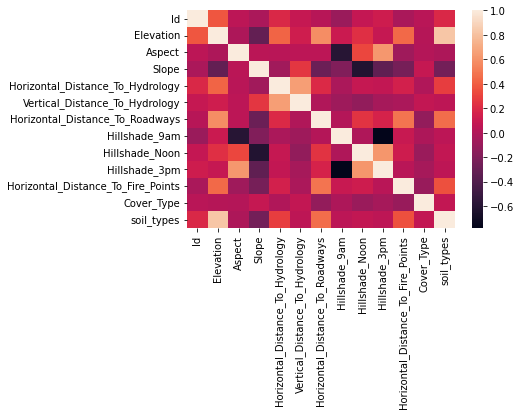

In [14]:
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns
sns.heatmap(df[numeric_cols].corr())

In [16]:
#Mutual information to look at non-linear relationships
from sklearn.feature_selection import mutual_info_classif
mut_info = pd.Series(mutual_info_classif(df.drop("Cover_Type", axis=1),df["Cover_Type"]), 
                     index=df.drop("Cover_Type", axis=1).columns)

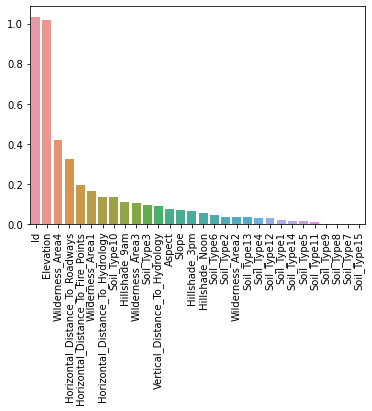

In [17]:
mut_info_com = mut_info[:30].sort_values(ascending=False)
sns.barplot(x=mut_info_com.index, y=mut_info_com)
plt.xticks(rotation=90);


### Aspect Variable:
Aspect is measured in _degrees azimuth_.

The azimuth is the angle between North, measured clockwise around the observer's horizon, and a celestial body (sun, moon).

In [18]:
grouped = df.groupby("Cover_Type") 

pd.DataFrame({"mean":grouped["Aspect"].mean(),
               "std":grouped["Aspect"].std(),
               "mean/std":grouped["Aspect"].mean() / grouped["Aspect"].std()
               })

,mean,std,mean/std
Cover_Type,,,
1,155.886574,117.240246,1.329634
2,151.112500,108.654275,1.390764
3,173.583796,107.817029,1.609985
4,138.897685,87.484210,1.587689
5,138.058796,90.768030,1.521007
6,179.995833,132.967779,1.353680
7,153.306481,109.829269,1.395862


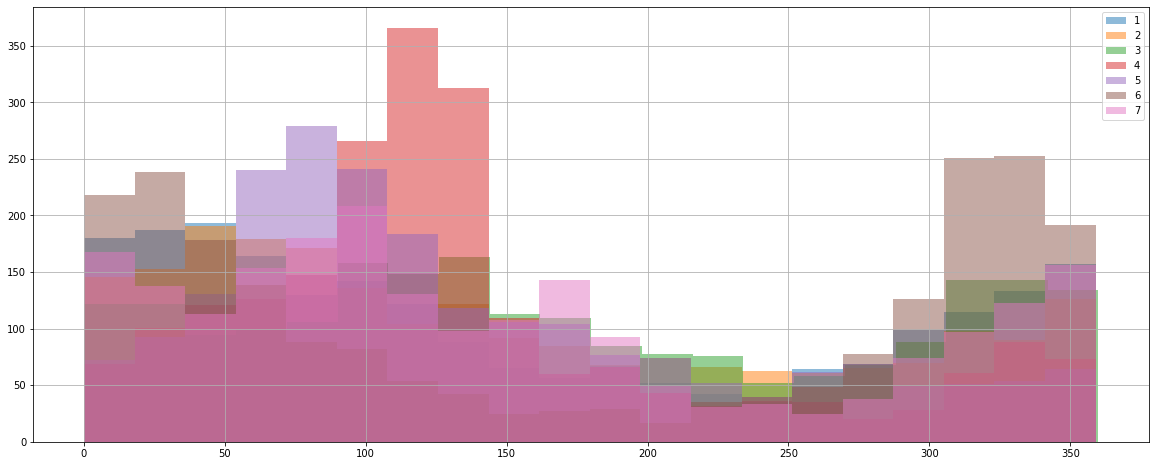

In [31]:
grouped["Aspect"].hist(alpha=0.5, figsize=(20,8), bins=20)
plt.legend(grouped.groups.keys())
plt.show()

## Encode data from soil type
In data description, there is data that is not available in the dataset that can be encoded. First digit of ELU represents climatic zone and second digit represents the geologic zone. We can do either of these two things: 
- Introduce two new categorical columns encoding this data by grouping all the variable with the same digits
- Encode this information in categorical variables somehow.

Detailed approach:
If we can find a main feature specific to the climatic zones and geologic zones, we can encode this. This can be temperature or something else.

### climatic zones:

https://en.wikipedia.org/wiki/Montane_ecosystems
 
- __Sierra Nevada lower montane forest -->__
Moving southward, the elevation range of the lower montane forest grows. Its elevation range at the northern end of the Sierra is from 1,200–5,500 feet (370–1,680 m). In the central Sierra, its elevation range is from 3,000–7,000 feet (910–2,130 m). In the southern end of the Sierra, its range is from 2,500–9,000 feet (760–2,740 m). __The daily high temperature in the summer is 80–90 °F (27–32 °C), while the daily lows in winter are around 28–34 °F (−2–1 °C)__. Annual precipitation depends on elevation: Yosemite Valley at 4,000 feet (1,200 m) gets 37 inches (940 mm) a year.

- __Bolivian montane dry forests -->__
Altitudes are from 360–700 metres (1,180–2,300 ft) above sea level. At a sample location at 18.75°S 65.25°W the Köppen climate classification is "Cwb": warm temperate, winter dry, warm summer. At this location the __mean monthly temperatures range from 13.5 °C (56.3 °F) in July to 18.8 °C (65.8 °F) in November__. Yearly total precipitation is about 580 millimetres (23 in). Average monthly precipitation is below 10 millimetres (0.39 in) in May–August, and rises to 137.4 millimetres (5.41 in) in January.

- __subalpine-->__
https://www.nps.gov/olym/learn/nature/subalpine-forests.htm#:~:text=The%20subalpine%20forest%20is%20a,too%20challenging%20for%20tree%20growth.

- __Northern transitional alpine forests-->__
It varies greatly in elevation from the heavily glacierized areas of the Hazelton and Skeena mountains between 2,500–2,800 m (8,200–9,200 ft), to the Nass and Skeena river valleys below 750 m (2,460 ft).
 In the west it has a warm humid continental climate (Köppen Dsb ) with warm summers and cold winters. In the east it has a subarctic climate (Köppen Dfc ) with cool summers and cold winters. Precipitation ranges from 2500mm (98.4 in) in the western coastal areas of the Nass River valley, to 600mm (23.6 in) in the lower elevations of the interior Bulkley Ranges. Temperature varies greatly with elevation, but averages around 13°C (55.4°F) in the summer and -9.5°C (14.9°F) in the winter.






In [40]:
df.Soil_Type1.value_counts()

0    14781
1      339
Name: Soil_Type1, dtype: int64

In [89]:
climatic_zone = {
            "lower_montane_dry":[],
            "lower_montane":[1,2,3,4,5,6],
            "montane_dry":[7,8],
            "montane":[9,10,11,12,13],
            "montane_dry_and_montane":[14,15],
            "montane_and_subalpine":[16,17,18],
            "subalpine":list(range(19,35)),
            "alpine":[35,36,37,38,39,40]
                 }

geologic_zones = {
          "alluvium":[14,15,16,17,19,20,21],
          "glacial":[9,22,23],
          "shale":[],
          "sandstone":[],
          "mixed_sedimentary":[7,8],
          "unspecified":[], 
          "igneous_metamorphic":[item for sublist in [list((range(1,7))), list(range(10,14)), [18], list(range(24,41))] for item in sublist],
          "volcanic":[]
          }

#verify their length
length = 0
for i in climatic_zone.values():
     length += len(i)
print(length)

length = 0
for i in geologic_zones.values():
     length += len(i)
print(length)
                 

40
40


### For wilderness areas, we have:
- 1 -- Rawah Wilderness Area
- 2 -- Neota Wilderness Area
- 3 -- Comanche Peak Wilderness Area
- 4 -- Cache la Poudre Wilderness Area

We can encode the coordinates (or some other external property from these areas) to the feature (average temperature?)

### Target Variable

In [ ]:
y.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Classes of equal length

### Dummy Classification

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
X = df.copy()
y = X.pop("Cover_Type")

model = DecisionTreeClassifier()
kf = KFold()
accuracies = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    model.fit(X.loc[train_index], y[train_index])
    yhat = model.predict(X.loc[test_index])
    accuracies.append(f1_score(y[test_index],yhat, average="macro"))
print(f"mean accuracy = {sum(accuracies)/len(accuracies)}")
    

mean accuracy = 0.1732780458489285


Best params so far:
- learning rate = 0.3
- max_depth = 11

In [98]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'deviance',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X = df.copy()
y = X.pop("Cover_Type")

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingClassifier())
        ])

params = {
           #"model__learning_rate":[0.2, 0.3, 0.4],
           #"model__max_depth":[9,11],
           "model__learning_rate":[0.3],
           "model__max_depth":[11],
           #"model__max_features:":["auto", "None"],
           "model__min_samples_leaf":[1,4,7],
           "model__min_samples_split":[2,5,8]
        }


search2 = GridSearchCV(pipe, params, cv=3, n_jobs=2, verbose=3) 

search2.fit(X, y)

print("best params: ", search2.best_params_)

y_pred = search2.predict(df_test)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [68]:
df.columns[~df.columns.isin(df_test.columns)]

Index(['Cover_Type'], dtype='object')

In [92]:
#submission
sub = pd.read_csv("Data/full_submission.csv")
sub["Cover_Type"] = y_pred
sub.to_csv("submission3.csv", index=False)
sub

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,2
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


In [94]:
sub["Cover_Type"].value_counts()

2    250436
1    213038
3     37364
7     29576
5     24314
6     22544
4      3740
Name: Cover_Type, dtype: int64

# Tpot Predictions

In [55]:
import tpot
X = df.copy()
y = X.pop("Cover_Type")

model = tpot.TPOTClassifier(generations=5, population_size=10, cv=3, verbosity=3, n_jobs=3)
model.fit(X,y)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:

-1	0.7292328042328041	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=21, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=distance)

-2	0.784589947089947	ExtraTreesClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.049), ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.6000000000000001, ExtraTreesClassifier__min_samples_leaf=17, ExtraTreesClassifier__min_samples_split=18, ExtraTreesClassifier__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 Invalid classes inferred from unique values of 

TPOTClassifier(cv=3, generations=5, n_jobs=3, population_size=10, verbosity=3)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))